In [1]:
import numpy as np

In [2]:
import numpy as np

class KNNClassifier:
    def __init__(self, n_neighbors='auto', p=2):
        self.n_neighbors = n_neighbors
        self.p = p
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.n_neighbors == 'auto':
            self.n_neighbors = int(np.sqrt(len(self.X)))
            if self.n_neighbors % 2 != 0:
                self.n_neighbors += 1
        return self
    
    def predict(self, X):
        predictions = []
        self.confidence = []
        for pred_row in X:
            euclidean_distances = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                euclidean_distances.append(distance)
            neighbors = self.y[np.argsort(euclidean_distances)[:self.n_neighbors]]
            neighbors_bc = np.bincount(neighbors)
            prediction = np.argmax(neighbors_bc)
            self.confidence.append(neighbors_bc[prediction]/len(neighbors))
            predictions.append(prediction)
        predictions = np.array(predictions)
        return predictions


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [38]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [39]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [40]:
y_pred=knn.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


0.9666666666666667

<AxesSubplot:>

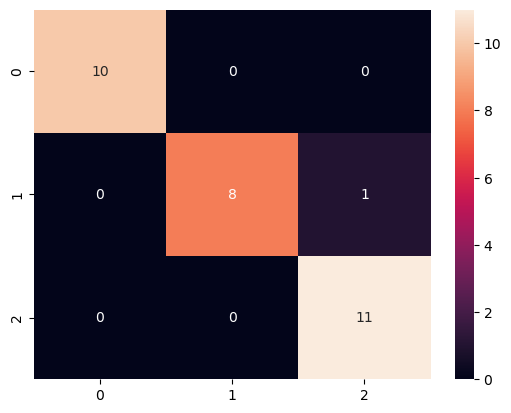

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)


In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)








Accuracy: 0.9666666666666667
